In [1]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits, fetch_openml

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

# ground truth

In [2]:
I_hat = np.load(open("./tsne_data_reducted_normalised.npy", "rb"))
I_hat.shape

(70000, 3)

In [5]:
a = I_hat[:10, :]
a.shape

(10, 3)

In [6]:
a

array([[0.54000233, 0.45737847, 5.        ],
       [0.83101381, 0.5242549 , 0.        ],
       [0.67143392, 0.86606263, 4.        ],
       [0.24522361, 0.19481922, 1.        ],
       [0.39709762, 0.72694153, 9.        ],
       [0.8046877 , 0.29342662, 2.        ],
       [0.06441569, 0.53734178, 1.        ],
       [0.43759686, 0.0545556 , 3.        ],
       [0.05593036, 0.50036436, 1.        ],
       [0.51118938, 0.64193309, 4.        ]])

In [10]:
mat = np.zeros((100,100))
for i in range(len(a)):
    xx = min(int(np.floor(a[i,0]*100)), 99)
    yy = min(int(np.floor(a[i,1]*100)), 99)
    mat[xx,yy] = a[i, 2]
mat.shape

(100, 100)

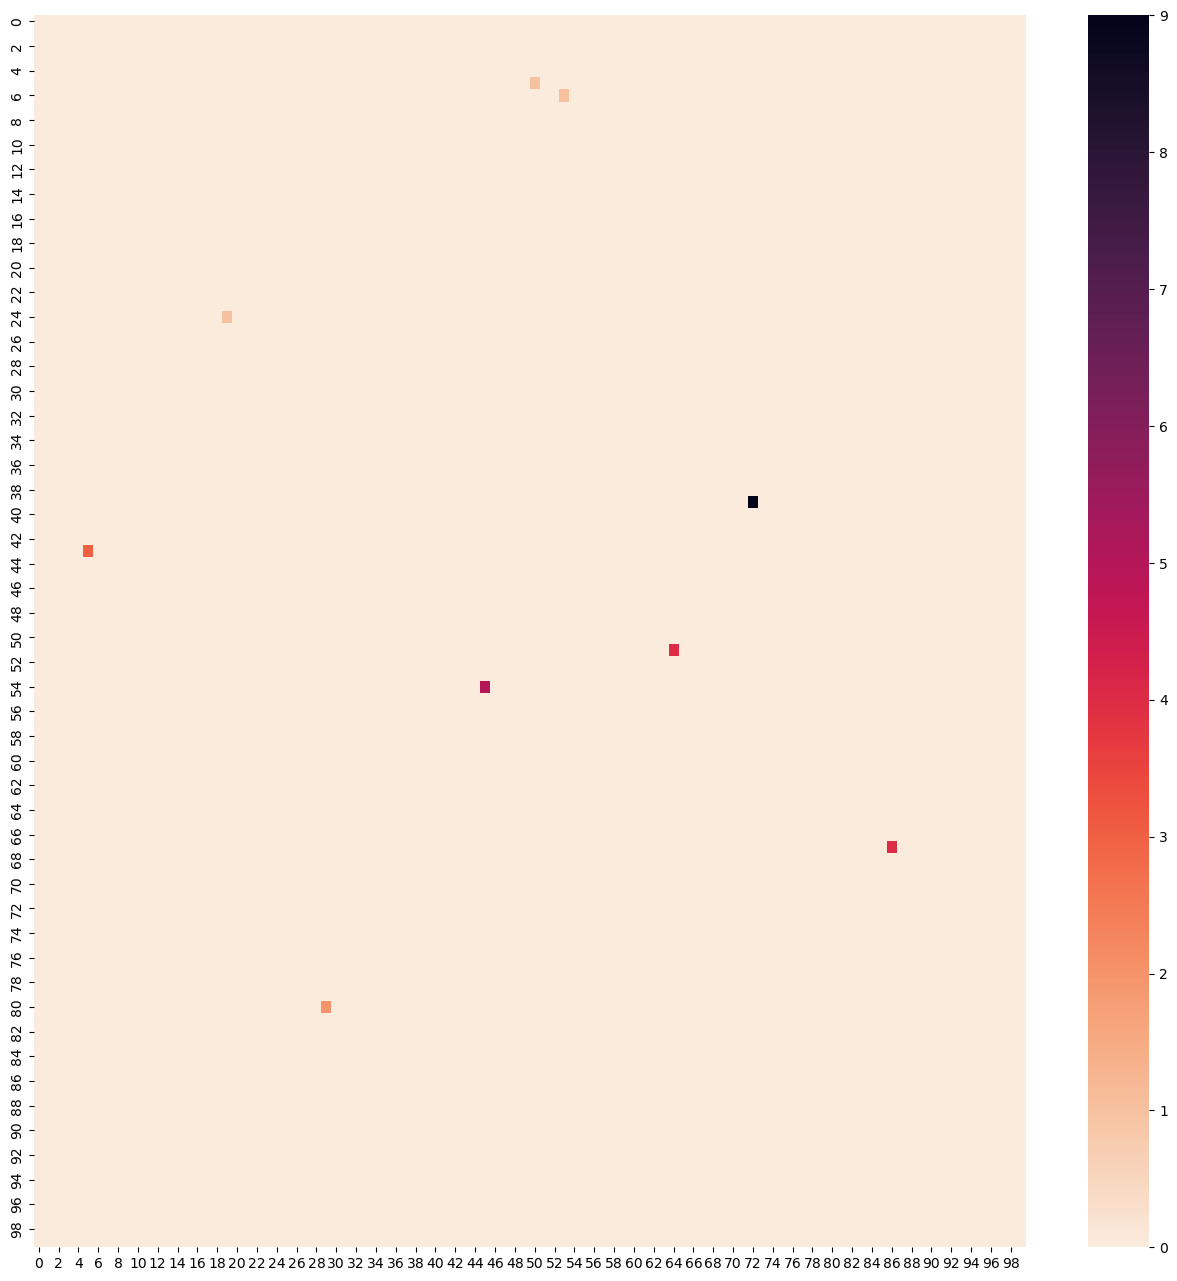

In [11]:
plt.figure(figsize=(16,16))
sn.heatmap(mat, cmap=sn.color_palette("rocket_r", as_cmap=True))
plt.show()

# solution

In [94]:
I_hat = torch.tensor(I_hat, requires_grad=True)
I_hat.shape

C:\Users\wanzh\AppData\Local\Temp\ipykernel_33740\2294987996.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  I_hat = torch.tensor(I_hat, requires_grad=True)


torch.Size([70000, 3])

In [95]:
def row_idx(pos, size=100):
    x, y = pos

    xx = min(int(np.floor(x*size)), size-1)
    yy = min(int(np.floor(y*size)), size-1)

    return xx*size + yy

# idx = [row_idx(i) for i in a[:, :2]]
I_idx = [row_idx(i, size=1000) for i in I_hat[:, :2].detach().numpy()]

In [104]:
I_idx = torch.tensor(I_idx, dtype=int).reshape(1, -1)
# I_src = torch.tensor(I_hat[:, 2], dtype=float).reshape(1, -1)

I = torch.zeros(1,1000*1000, dtype=float, requires_grad=True)
I1 = I.clone()
I1 = I1.scatter_(dim=1, index=I_idx, src=I_hat[:, 2].reshape(1, -1))
I1.shape

C:\Users\wanzh\AppData\Local\Temp\ipykernel_33740\4020812726.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  I_idx = torch.tensor(I_idx, dtype=int).reshape(1, -1)


torch.Size([1, 1000000])

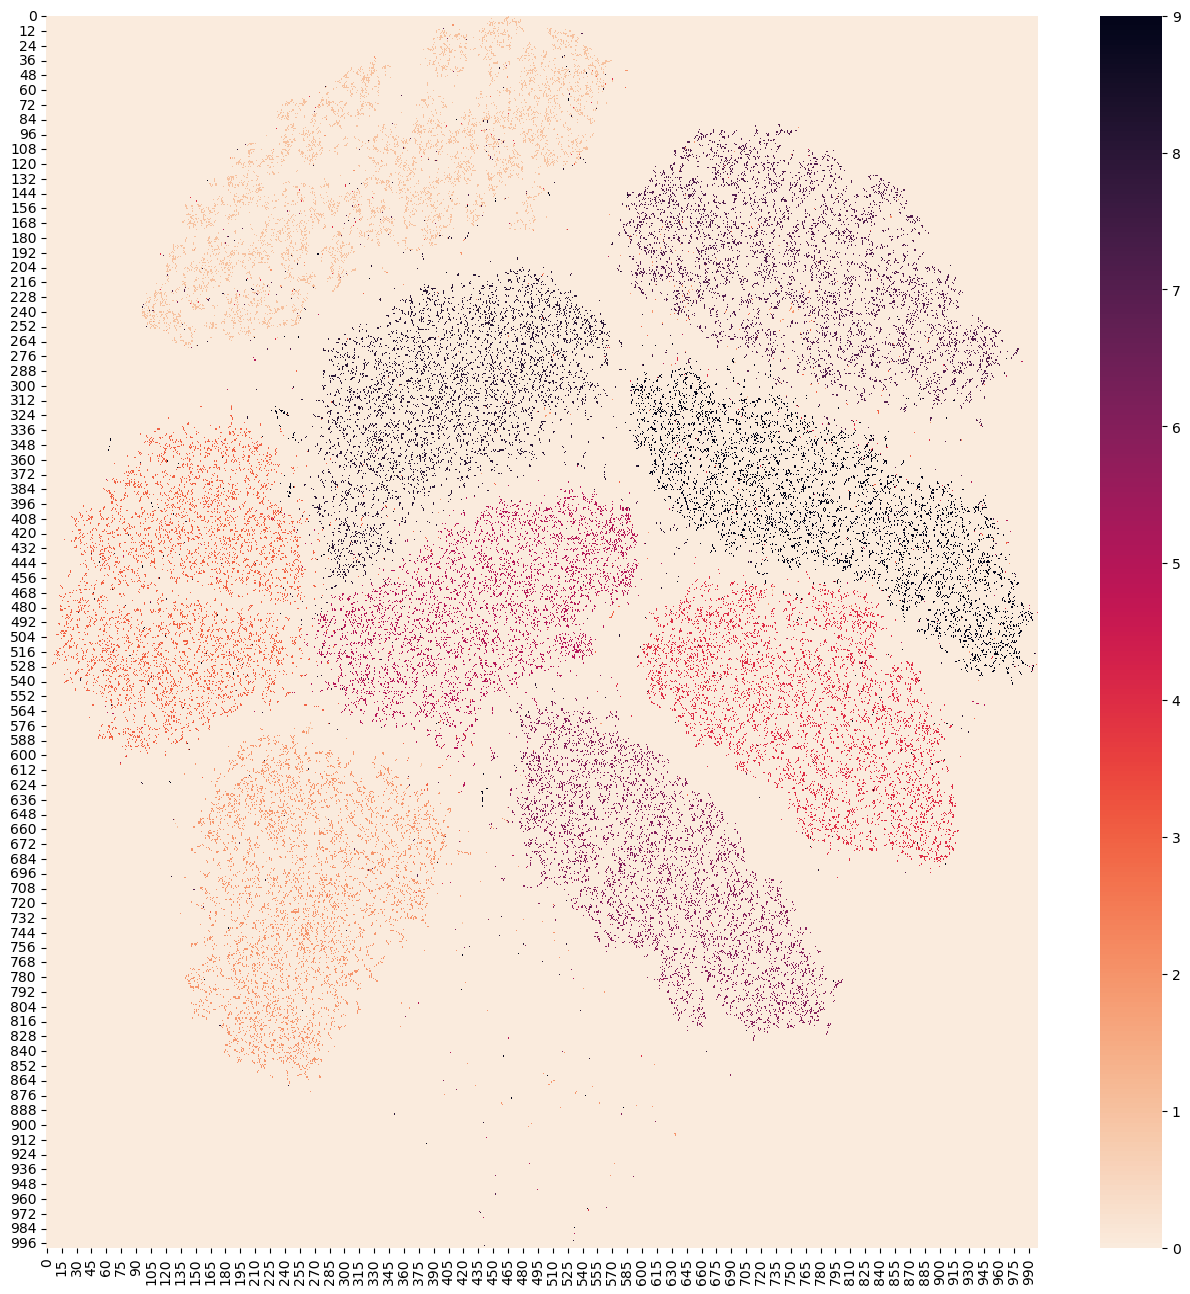

In [105]:
plt.figure(figsize=(16,16))
sn.heatmap(I1.reshape((1000,1000)).detach().numpy(), cmap=sn.color_palette("rocket_r", as_cmap=True))
plt.show()

In [106]:
I_gt = torch.zeros(I.shape, dtype=float)

criterion = nn.MSELoss()

loss = criterion(I1, I_gt)
loss.backward()

In [107]:
I_hat.grad

tensor([[0.0000e+00, 0.0000e+00, 1.0000e-05],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 8.0000e-06],
        ...,
        [0.0000e+00, 0.0000e+00, 8.0000e-06],
        [0.0000e+00, 0.0000e+00, 1.0000e-05],
        [0.0000e+00, 0.0000e+00, 1.2000e-05]], dtype=torch.float64)

In [108]:
I_hat.grad.shape

torch.Size([70000, 3])

### using demo a

In [51]:
a[:, :2]

array([[0.54000233, 0.45737847],
       [0.83101381, 0.5242549 ],
       [0.67143392, 0.86606263],
       [0.24522361, 0.19481922],
       [0.39709762, 0.72694153],
       [0.8046877 , 0.29342662],
       [0.06441569, 0.53734178],
       [0.43759686, 0.0545556 ],
       [0.05593036, 0.50036436],
       [0.51118938, 0.64193309]])

In [52]:
b_idx = torch.tensor(idx, dtype=int).reshape(1, -1)
b_src = torch.tensor(a[:, 2], dtype=int).reshape(1, -1)

b = torch.zeros(1,100*100, dtype=int).scatter_(dim=1, index=b_idx, src=b_src)
b.shape

torch.Size([1, 10000])

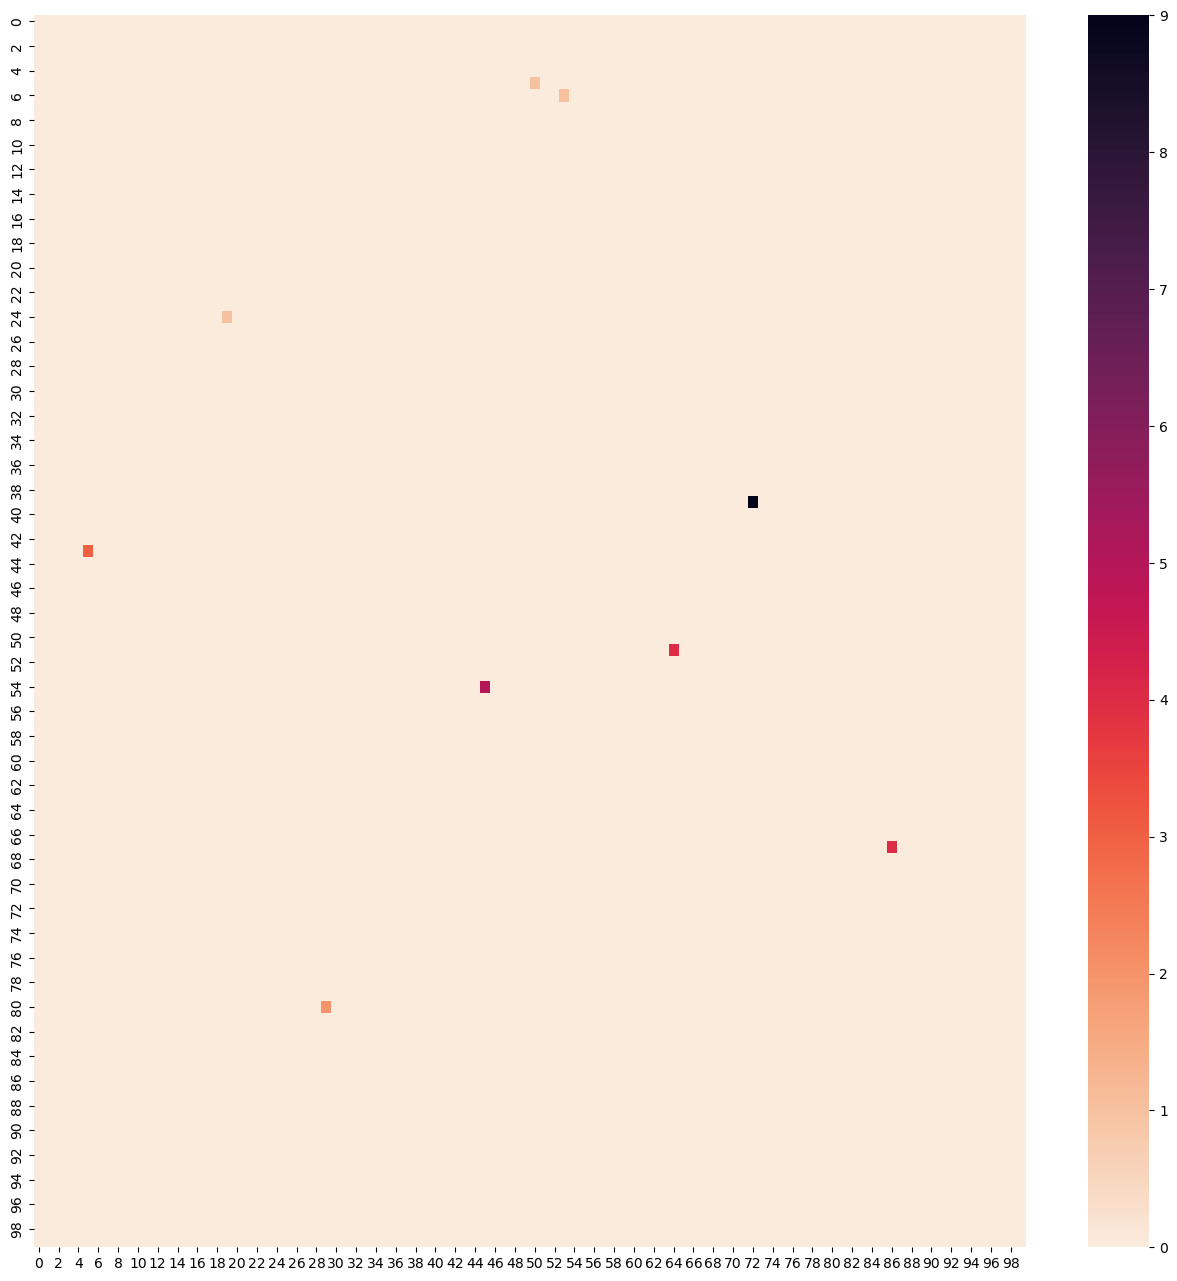

In [53]:
plt.figure(figsize=(16,16))
sn.heatmap(b.reshape((100,100)), cmap=sn.color_palette("rocket_r", as_cmap=True))
plt.show()

In [40]:
x = torch.tensor([1,2,3], dtype=int).reshape(1, -1)
x_idx = torch.tensor([3,5,7], dtype=int).reshape(1, -1)

torch.zeros(1,100, dtype=int).scatter_(1, x_idx, x)

tensor([[0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

# VisualImitation module

In [156]:
class VisualImitation(nn.Module):
    def __init__(self, size=1000):
        super(VisualImitation, self).__init__()

        self.size = size

    def row_idx(self, pos, size=1000):
        x, y = pos

        xx = min(int(np.floor(x*size)), size-1)
        yy = min(int(np.floor(y*size)), size-1)

        return xx*size + yy

    def forward(self, x):

        idx = torch.tensor([self.row_idx(pos=i, size=self.size) for i in x[:, :2].detach().numpy()], dtype=int).reshape(1, -1)
        src = x[:, 2].reshape(1, -1)
        src = src.float()

        I = torch.zeros(1, self.size*self.size, requires_grad=True)
        I = I.float()
        I1 = I.clone()
        I1 = I1.scatter_(dim=1, index=idx, src=src)
        I2 = I1.reshape((self.size, self.size))

        return I2


In [157]:
class Predictor(nn.Module):
    def __init__(self, batch_size=1024):
        super(Predictor, self).__init__()

        self.mlp = nn.Sequential(
            nn.Linear(batch_size*2, batch_size), 
            nn.ReLU(), 
            nn.Linear(batch_size, batch_size), 
        )


    def forward(self, z):

        z = self.mlp(z)
    
        return z.view(-1)

In [158]:
class demo_VI(nn.Module):
    def __init__(self, batch_size=1024, size=1000):
        super(demo_VI, self).__init__()

        self.batch_size = batch_size
        self.size = size

        self.pred = Predictor(batch_size=self.batch_size)
        self.vi = VisualImitation(size=self.size)

    def forward(self, z):
        # label = self.pred(z[:, :2].reshape(1,-1))
        label = self.pred(z.reshape(1,-1))
        new_df = torch.hstack([z[:, :2].float(), label.reshape(-1,1).float()])
        out = self.vi(new_df)

        return out

In [188]:
z = np.load(open("./tsne_data_reducted_normalised.npy", "rb"))
z = torch.tensor(z, requires_grad=True, dtype=float)
z.shape

torch.Size([70000, 3])

### ablation on demo_VI

In [189]:
model = demo_VI(batch_size=1024, size=1000)

pos = z[:1024, :2].reshape(-1,2).detach().clone()
pos.requires_grad_(True)
# I_cls = I_hat[:1024, 2].reshape(-1,1).clone()

# I_in = torch.hstack([I_pos, I_cls])

# I_pred = model(I_in.float())
pred = model(pos.float())
pred.shape

# failed due to limited memory size when batch_size=70000

torch.Size([1000, 1000])

In [190]:
from utils import *

draw_Ihat(pred.detach().numpy())

In [191]:
vi_gt = VisualImitation(size=1000)

gt = vi_gt(z.detach())
gt.shape

torch.Size([1000, 1000])

In [192]:
criterion = nn.MSELoss()

loss = criterion(gt, pred)
loss.backward()

In [193]:
pos.grad, pos.grad.shape

(tensor([[-4.0765e-07,  6.1609e-07],
         [-2.7778e-06, -4.8909e-06],
         [-1.0560e-07, -1.0240e-06],
         ...,
         [ 1.2288e-06, -1.9076e-06],
         [ 2.1902e-06,  1.4815e-06],
         [ 1.5383e-06, -2.2813e-07]], dtype=torch.float64),
 torch.Size([1024, 2]))

### ablation on VI

In [7]:
I_gt = torch.zeros((1000, 1000), requires_grad=True, dtype=float)
I_gt.shape

torch.Size([1000, 1000])

In [8]:
vi = VisualImitation(size=1000)

I_pred = vi(I_hat)
I_pred.shape

torch.Size([1000, 1000])

In [146]:
criterion = nn.MSELoss()

loss = criterion(I_gt, I_pred)
loss.backward()

In [148]:
I_hat.grad, I_hat.grad.shape

(tensor([[0.0000e+00, 0.0000e+00, 1.0000e-05],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 8.0000e-06],
         ...,
         [0.0000e+00, 0.0000e+00, 8.0000e-06],
         [0.0000e+00, 0.0000e+00, 1.0000e-05],
         [0.0000e+00, 0.0000e+00, 1.2000e-05]], dtype=torch.float64),
 torch.Size([70000, 3]))

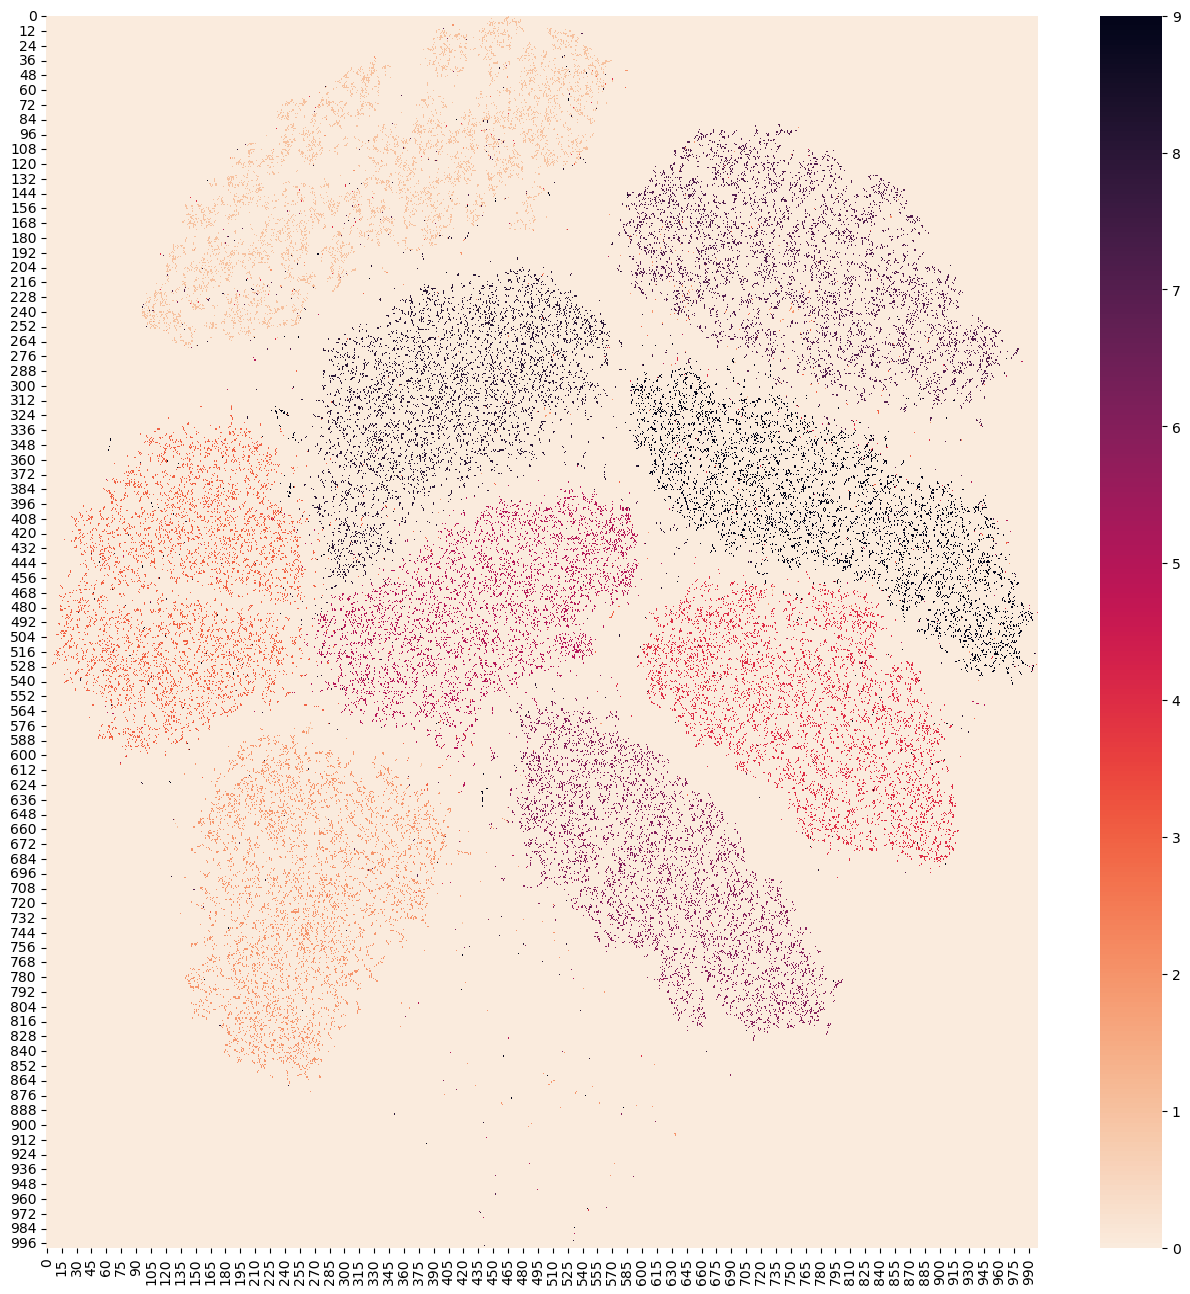

In [145]:
plt.figure(figsize=(16,16))
sn.heatmap(I_pred.reshape((1000,1000)).detach().numpy(), cmap=sn.color_palette("rocket_r", as_cmap=True))
plt.show()

# continuous function from Z to I_hat

In [2]:
Z = np.load(open("./tsne_data_reducted_normalised.npy", "rb"))
Z = torch.tensor(Z, requires_grad=True, dtype=float)
Z.shape

torch.Size([70000, 3])

In [4]:
Z[0]

tensor([0.5400, 0.4574, 5.0000], dtype=torch.float64,
       grad_fn=<SelectBackward0>)

In [170]:
z1 = Z[1][:2].detach().clone()
z1.requires_grad_(True)
z1

tensor([0.8310, 0.5243], dtype=torch.float64, requires_grad=True)

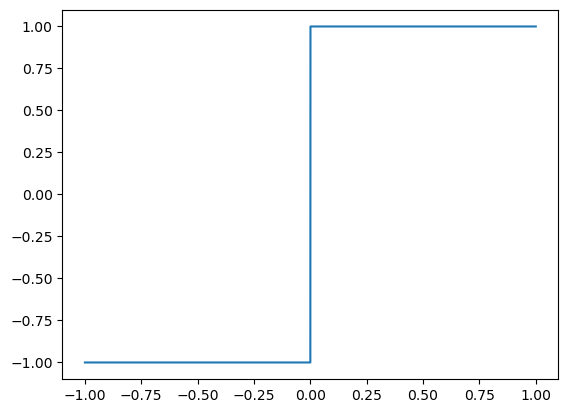

In [171]:
def myact(x):
    # return nn.Sigmoid()(x)
    return nn.Tanh()(x*100000)

a = torch.arange(start=-1,end=1,step=0.0001,dtype=float)
b = myact(a)

plt.plot(a,b)

In [198]:
def get_m(zi, pts=0):
    a = torch.ones(1000, 1000) * zi[0] * 1000
    b = torch.ones(1000, 1000) * zi[1] * 1000
    if pts==0:
        gridx = torch.arange(1,1001)
        gridy = torch.arange(1,1001)
    elif pts==1:
        gridx = torch.arange(0,1000)
        gridy = torch.arange(1,1001)
    elif pts==2:
        gridx = torch.arange(2,1002)
        gridy = torch.arange(2,1002)
    elif pts==3:
        gridx = torch.arange(1,1001)
        gridy = torch.arange(0,1000)

    x_new = myact(a-gridx)
    y_new = myact(b-gridy.reshape(-1,1))
    m = myact(x_new*y_new)

    return x_new, y_new, m

In [199]:
x_new, y_new, m = get_m(z1, pts=0)

In [200]:
size = 1000
xx = min(int(np.floor(z1[0].detach().numpy()*size)), size-1)
yy = min(int(np.floor(z1[1].detach().numpy()*size)), size-1)
xx, yy

(831, 524)

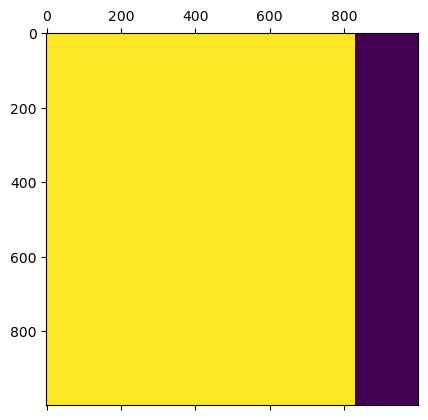

In [201]:
plt.matshow(x_new.detach().numpy())

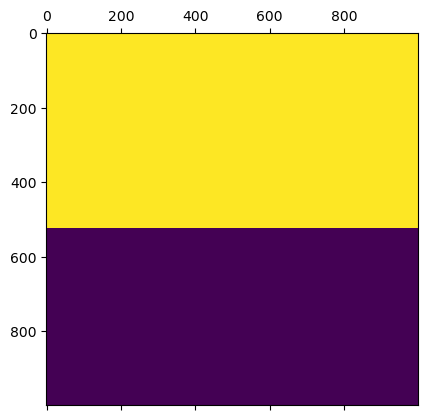

In [202]:
plt.matshow(y_new.detach().numpy())

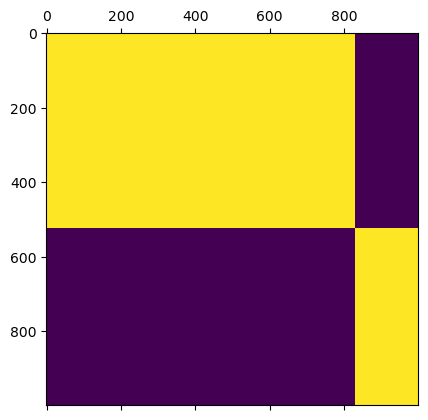

In [203]:
plt.matshow(m.detach().numpy())

In [204]:
m[(524-2):(524+3), (831-2):(831+3)]

tensor([[ 1.,  1., -1., -1., -1.],
        [ 1.,  1., -1., -1., -1.],
        [-1., -1.,  1.,  1.,  1.],
        [-1., -1.,  1.,  1.,  1.],
        [-1., -1.,  1.,  1.,  1.]], grad_fn=<SliceBackward0>)

In [205]:
res = []

for i in range(4):
    x_new, y_new, m = get_m(z1, pts=i)

    res.append((x_new, y_new, m))

In [271]:
M = torch.ones((1000,1000), dtype=float)
# M = res[0][-1] * res[1][-1] * res[2][-1] * res[3][-1]
# M = res[0][-1] * res[2][-1]
M = res[1][-1] * res[3][-1]
M.shape

torch.Size([1000, 1000])

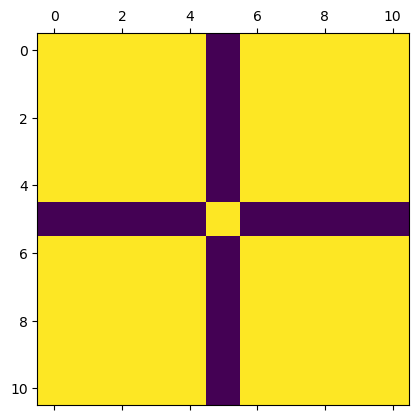

In [272]:
k = 5
plt.matshow(M[(524-k):(524+k+1), (831-k):(831+k+1)].detach().numpy())

In [273]:
M

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], grad_fn=<MulBackward0>)

In [274]:
np.where(M.detach().numpy()==-1)

(array([  0,   1,   2, ..., 997, 998, 999], dtype=int64),
 array([831, 831, 831, ..., 831, 831, 831], dtype=int64))

In [276]:
M[(524-2):(524+3), (831-2):(831+3)]

tensor([[ 1.,  1., -1.,  1.,  1.],
        [ 1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1., -1., -1.],
        [ 1.,  1., -1.,  1.,  1.],
        [ 1.,  1., -1.,  1.,  1.]], grad_fn=<SliceBackward0>)

In [282]:
def myfunc(z):
    mask = torch.zeros((1000,1000), dtype=float)
    i = min(int(torch.floor(z[0]*size)), size-1)
    j = min(int(torch.floor(z[1]*size)), size-1)
    mask[i][j] = 1

    return mask

In [300]:
masks = torch.vmap(myfunc)(Z)
masks.shape

AttributeError: module 'torch' has no attribute 'vmap'

In [285]:
m1 = myfunc(z1)
m1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [287]:
flag = 0
for i in range(1000):
    for j in range(1000):
        if m1[i][j]==1:
            print(i, j)
            flag = 1
            break
    if flag==1:
        break

831 524


In [288]:
m1[831,524]

tensor(1., dtype=torch.float64)